In [6]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection
engine = create_engine('sqlite:///titanic.db')

# Load datasets
train_data = pd.read_csv('D:\Projects\Data_Science\\titanic_survival\\test.csv')
test_data = pd.read_csv('D:\Projects\Data_Science\\titanic_survival\\train.csv')

# Save to SQL database
train_data.to_sql('train', con=engine, index=False, if_exists='replace')
test_data.to_sql('test', con=engine, index=False, if_exists='replace')

print("Data loaded and saved to SQL database.")


Data loaded and saved to SQL database.


In [2]:
# %pip install sqlalchemy

  Using cached SQLAlchemy-2.0.31-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
  Using cached greenlet-3.0.3-cp310-cp310-win_amd64.whl.metadata (3.9 kB)
Using cached SQLAlchemy-2.0.31-cp310-cp310-win_amd64.whl (2.1 MB)
Using cached greenlet-3.0.3-cp310-cp310-win_amd64.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

AttributeError: Rectangle.set() got an unexpected keyword argument 'train_df'

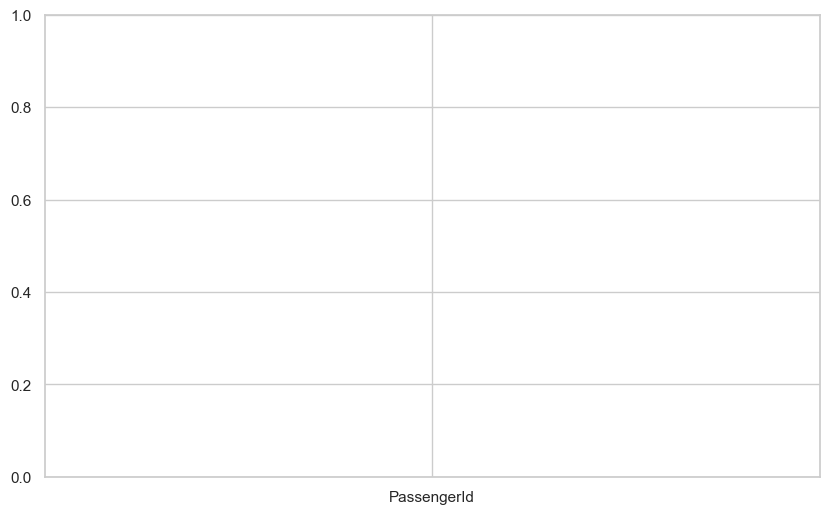

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from SQL
query = "SELECT * FROM train"
train_df = pd.read_sql(query, con=engine)

query = "SELECT * FROM test"
test_df = pd.read_sql(query, con=engine)

# Basic info and statistics
print(train_df.info())
print(train_df.describe())

# Visualizations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(train_df='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(train_data='Pclass', y='Fare', data=train_df)
plt.title('Fare Distribution by Pclass')
plt.show()
